# Problem Statement
Prepare a model for glass classification using KNN
### Data Description:
    RI : refractive index
    Na : Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg : Magnesium
    AI : Aluminum
    Si : Silicon
    K  : Potassium
    Ca : Calcium
    Ba : Barium
    Fe : Iron

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Zoo Data

In [3]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Exploratory Data Analysis

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


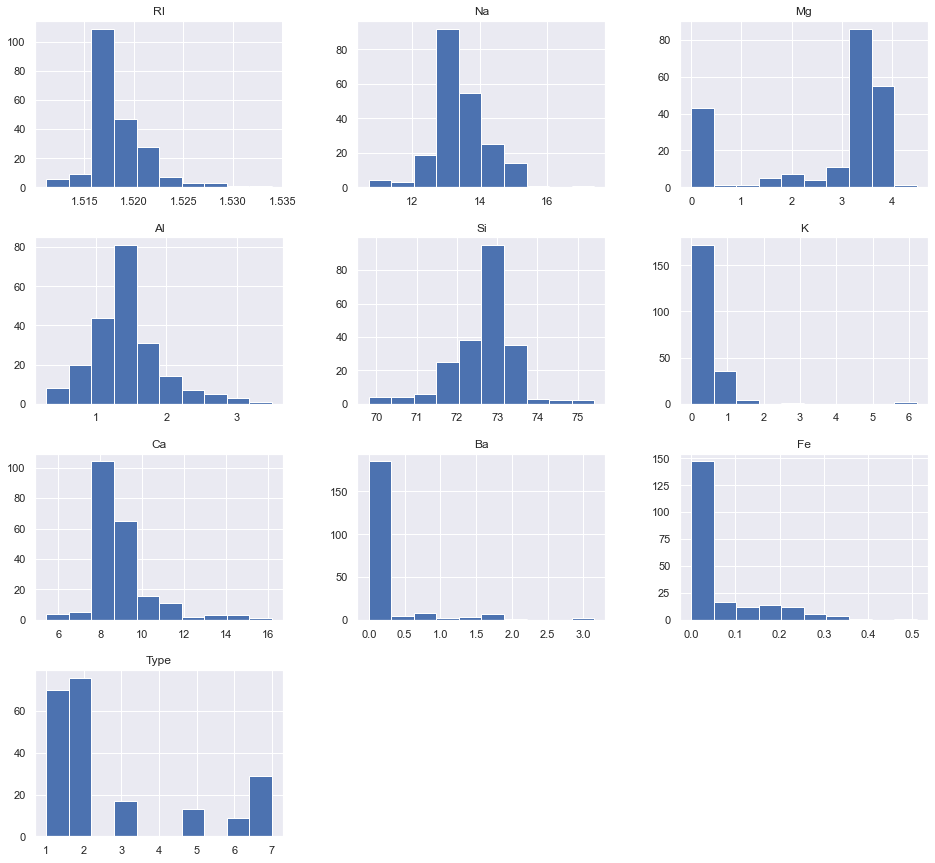

In [7]:
data.hist(figsize=(16,15))
plt.show()

In [8]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

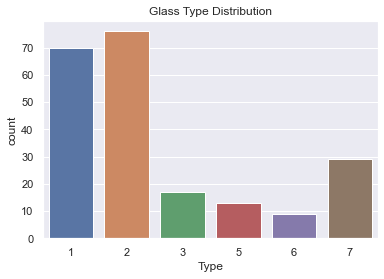

In [9]:
sns.countplot(x='Type',y=None, data = data)
plt.title('Glass Type Distribution')
plt.show()

In [12]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

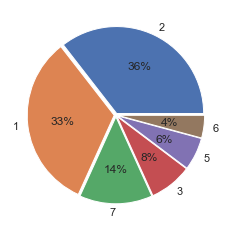

In [10]:
plt.pie(x =data['Type'].value_counts(),labels=[2,1,7,3,5,6],autopct='%1.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02])
plt.show()

# Defining Dependent and Independent Variables

In [6]:
X = data.drop('Type', axis = 1)
y = data['Type']

# Splitting the data for training and testing

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# K Neighbours Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# Confusion Matrix and Classification Report

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
y_pred = clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[56,  0,  0,  0,  0,  0],
       [15, 46,  0,  0,  0,  0],
       [ 9,  0,  5,  0,  0,  0],
       [ 0,  1,  0,  9,  0,  0],
       [ 0,  2,  0,  0,  5,  0],
       [ 1,  1,  0,  2,  1, 18]], dtype=int64)

In [10]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.82        56
           2       0.92      0.75      0.83        61
           3       1.00      0.36      0.53        14
           5       0.82      0.90      0.86        10
           6       0.83      0.71      0.77         7
           7       1.00      0.78      0.88        23

    accuracy                           0.81       171
   macro avg       0.88      0.75      0.78       171
weighted avg       0.85      0.81      0.81       171



# Model Testing

In [11]:
y_test_pred = clf.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[10,  3,  1,  0,  0,  0],
       [ 4,  9,  1,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  5]], dtype=int64)

In [12]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.62      0.71      0.67        14
           2       0.64      0.60      0.62        15
           3       0.33      0.33      0.33         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.65        43
   macro avg       0.68      0.61      0.63        43
weighted avg       0.66      0.65      0.65        43



# Model Parameters

In [13]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

# Error Rates Visualization for different weights parameters

In [14]:
error_uniform = []
error_distance = []
k_range = range(1, 51)
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

Text(0, 0.5, 'Error rate')

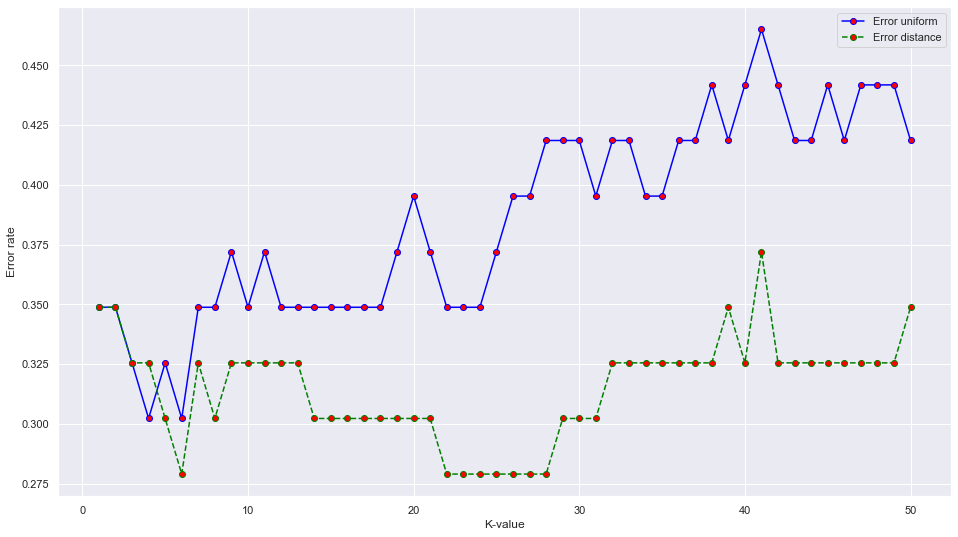

In [15]:
plt.figure(figsize = (16, 9))
plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Error rate')

# Choosing best Hyperparameters using GridSearchCV

In [16]:
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')

In [18]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

# Best Model Parameters

In [19]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [20]:
clf = grid_search.best_estimator_

In [21]:
clf

KNeighborsClassifier(n_neighbors=1)

In [22]:
grid_search.best_score_

0.7077310924369749

In [23]:
y_pred = clf.predict(x_train)
confusion_matrix(y_train, y_pred)

array([[56,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0, 23]], dtype=int64)

In [24]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        23

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [25]:
y_test_pred = clf.predict(x_test)

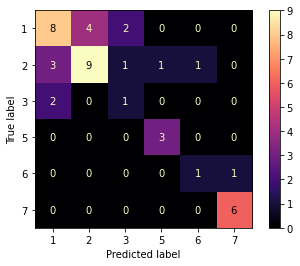

In [26]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels = clf.classes_, cmap = 'magma')

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.62      0.57      0.59        14
           2       0.69      0.60      0.64        15
           3       0.25      0.33      0.29         3
           5       0.75      1.00      0.86         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.65        43
   macro avg       0.61      0.67      0.63        43
weighted avg       0.65      0.65      0.65        43

